# K-Nearest Neighbors

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import numpy as np
import csv
import random as rnd
import os 
import matplotlib.pyplot as plt
%matplotlib inline
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from sklearn.metrics import confusion_matrix
import sklearn.svm
import math
from sklearn.neighbors import NearestNeighbors

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
Xs = pd.DataFrame(np.random.uniform(-1,16,3000),columns=['x1'])
Xs['x2'] = np.random.uniform(-5,15,3000)

In [6]:
Xs['y']=np.where(((Xs['x1']-4)**2+(Xs['x2']-10)**2<9)|((Xs['x1']-4)**2+(Xs['x2']-1)**2<9)| ((Xs['x1']-12)**2+(Xs['x2']-10)**2<9) | ((Xs['x1']-12)**2+(Xs['x2']-1)**2<9),1,0)

In [7]:
xc=Xs[['x1','x2']]
yc=Xs[['y']]

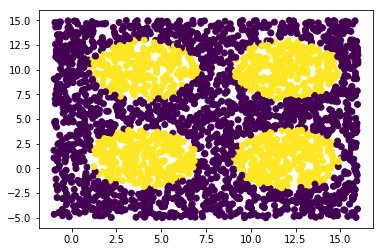

In [8]:
plt.scatter(Xs['x1'], Xs['x2'], c=Xs['y'])

### K nearest neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 
KNeighborsClassifier(...)
print(neigh.predict([[1.1]]))
[0]
print(neigh.predict_proba([[0.9]]))

In [9]:
neigh = KNeighborsClassifier(n_neighbors=4)

In [10]:
neigh.fit(xc, yc) 

C:\Users\70202752\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [11]:
y_predict = neigh.predict(xc)

In [12]:
confusion_matrix(yc, y_predict)

array([[1949,    4],
       [  31, 1016]])

### SVM

In [13]:
circ_2=sklearn.svm.SVC(kernel='rbf')
circ_2.fit(xc,yc)

C:\Users\70202752\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
yp_circ=circ_2.predict(xc)

In [17]:
confusion_matrix(yc, yp_circ)

array([[1935,   18],
       [  15, 1032]])

Comparando ambos métodos, observamos que la svm con kernel rbf sigue teniendo mayor accuracy que k nearest neighbors 